## Unsupervised Learning

### 1. Loading and Preprocessing
Load the Iris dataset from sklearn and drop the species column for clustering purposes.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(iris_data, columns=iris.feature_names)

# Drop the species column
# Note: In this case, the species information is in iris.tI am but we are ignoring it for clustering


### 2. Clustering Algorithm Implementation
A) KMeans Clustering
Description of KMeans Clustering:

KMeans clustering is an iterative algorithm that partitions a dataset into K distinct, non-overlapping subsets or clusters. The algorithm operates as follows:

Initialization: K initial cluster centroids are chosen randomly.
Assignment: Each data point is assigned to the nearest centroid based on the Euclidean distance.
Update: The centroids are recalculated as the mean of all points assigned to each cluster.
Repeat: Steps 2 and 3 are repeated until convergence (i.e., when the assignments no longer change).

- KMeans clustering is suitable for the Iris dataset because it is effective for datasets with well-separated clusters, and the Iris dataset has three species of flowers that should form distinct clusters in the feature space.

Implementation and Visualization:

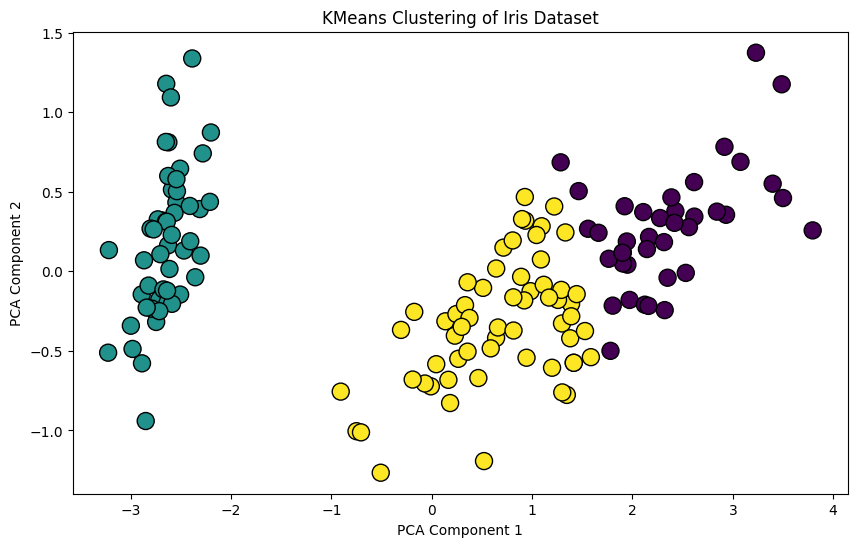

In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(iris_data)

# Visualize the clusters
pca = PCA(2)
pca_iris = pca.fit_transform(iris_data)
plt.figure(figsize=(10, 6))

plt.scatter(pca_iris[:, 0], pca_iris[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=150)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering of Iris Dataset')
plt.show()


### B) Hierarchical Clustering
Description of Hierarchical Clustering:

Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. There are two main types:

Agglomerative (bottom-up): Each data point starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
Divisive (top-down): All data points start in one cluster, and splits are performed recursively as one moves down the hierarchy.
The result of hierarchical clustering is a tree-like diagram called a dendrogram.

- Hierarchical clustering is suitable for the Iris dataset because it provides a clear visual representation (dendrogram) of the data's structure and can be used to understand the number of clusters in the data.

Implementation and Visualization:

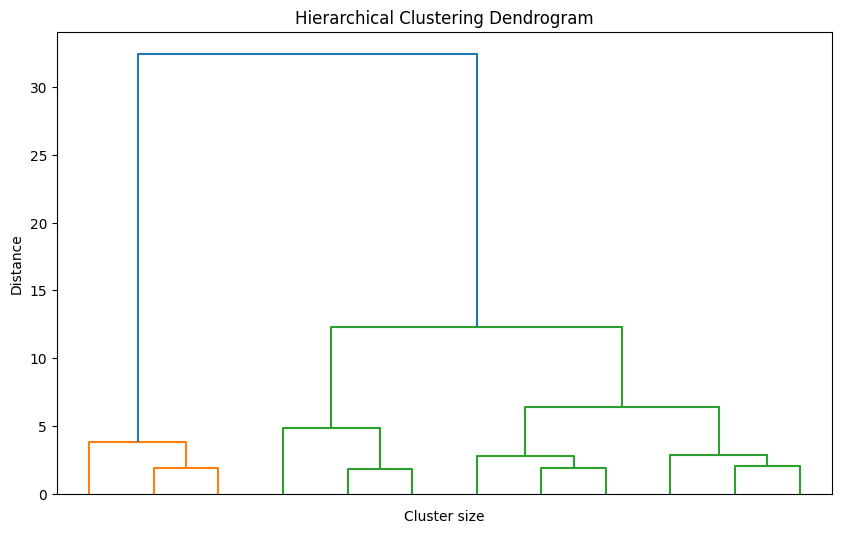

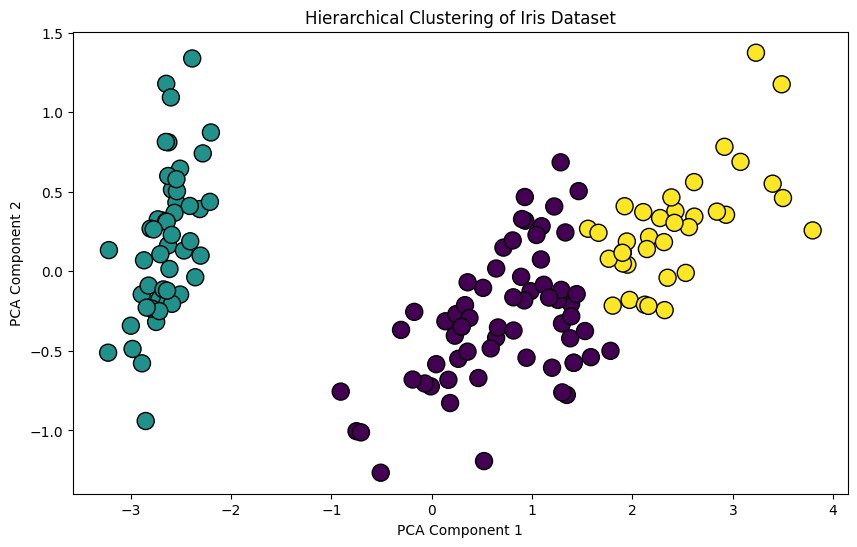

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical clustering
linked = linkage(iris_data, 'ward')
hierarchical_labels = AgglomerativeClustering(n_clusters=3).fit_predict(iris_data)

# Visualize the clusters using a dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=12, show_leaf_counts=False, leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

# Visualize the clusters in 2D using PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_iris[:, 0], pca_iris[:, 1], c=hierarchical_labels, cmap='viridis', edgecolor='k', s=150)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hierarchical Clustering of Iris Dataset')
plt.show()
